### 第一问：检查

绘图初审


Call:
lm(formula = Employed ~ ., data = longley)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41011 -0.15767 -0.02816  0.10155  0.45539 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.482e+03  8.904e+02  -3.911 0.003560 ** 
GNP.deflator  1.506e-02  8.492e-02   0.177 0.863141    
GNP          -3.582e-02  3.349e-02  -1.070 0.312681    
Unemployed   -2.020e-02  4.884e-03  -4.136 0.002535 ** 
Armed.Forces -1.033e-02  2.143e-03  -4.822 0.000944 ***
Population   -5.110e-02  2.261e-01  -0.226 0.826212    
Year          1.829e+00  4.555e-01   4.016 0.003037 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3049 on 9 degrees of freedom
Multiple R-squared:  0.9955,	Adjusted R-squared:  0.9925 
F-statistic: 330.3 on 6 and 9 DF,  p-value: 4.984e-10


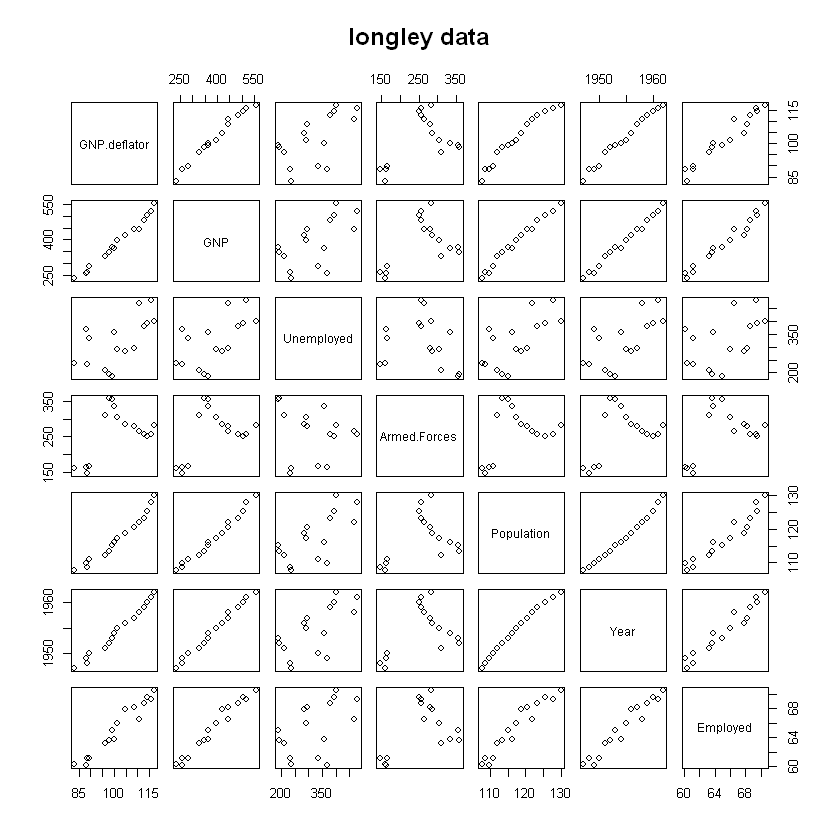

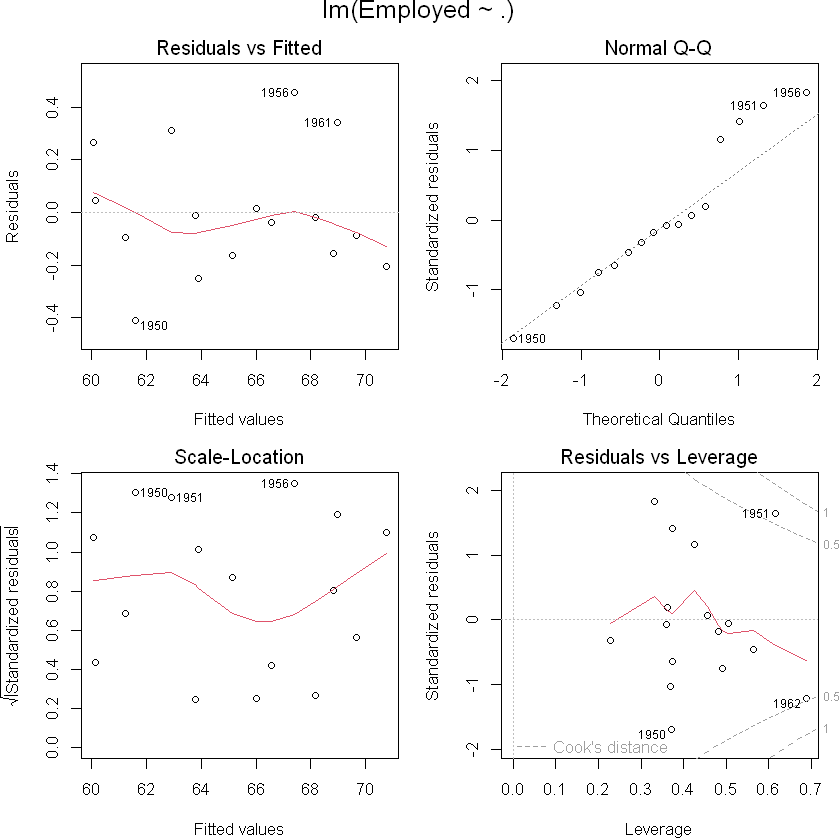

In [32]:
require(stats); require(graphics)
X=as.matrix(longley[,1:6])
y=as.matrix(longley[,7])
library(car)
## give the data set in the form it is used in S-PLUS:
longley.x <- data.matrix(longley[, 1:6])
longley.y <- longley[, "Employed"]
pairs(longley, main = "longley data")
summary(fm1 <- lm(Employed ~ ., data = longley))
opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0),
            mar = c(4.1, 4.1, 2.1, 1.1))
plot(fm1)
par(opar)

In [33]:
eigen(t(X)%*%X)

eigen() decomposition
$values
[1] 6.665299e+07 2.090730e+05 1.053550e+05 1.803976e+04 2.455730e+01
[6] 2.015117e+00

$vectors
            [,1]        [,2]        [,3]        [,4]        [,5]          [,6]
[1,] -0.04990131 -0.06979071 -0.03416853  0.04265870  0.95653127 -0.2733126381
[2,] -0.19075418 -0.72496814 -0.34330489  0.55402997 -0.07487553  0.0872940138
[3,] -0.15702286 -0.62152746  0.56371985 -0.52067703 -0.00716578  0.0105568115
[4,] -0.12796016 -0.10434859 -0.74630465 -0.64468394 -0.01222896 -0.0001122542
[5,] -0.05758090 -0.03841364 -0.01095845  0.03583083 -0.28108541 -0.9564496276
[6,] -0.95748481  0.26625145  0.07812474  0.05679111 -0.01522131  0.0526555591


方差扩大因子法

In [3]:
sqrt(vif(fm1))>2

GNP.deflator          GNP   Unemployed Armed.Forces   Population         Year 
        TRUE         TRUE         TRUE        FALSE         TRUE         TRUE

In [4]:
vif(fm1)  #不存在  10  较强   100    严重

GNP.deflator          GNP   Unemployed Armed.Forces   Population         Year 
   135.53244   1788.51348     33.61889      3.58893    399.15102    758.98060

特征根判定法

In [30]:
XX<-cor(X)
kappa(t(X)%*%X,exact=T)

[1] 33076481

条件数： 程度小  100  较强  1000  严重

相关系数阵

corrplot 0.92 loaded



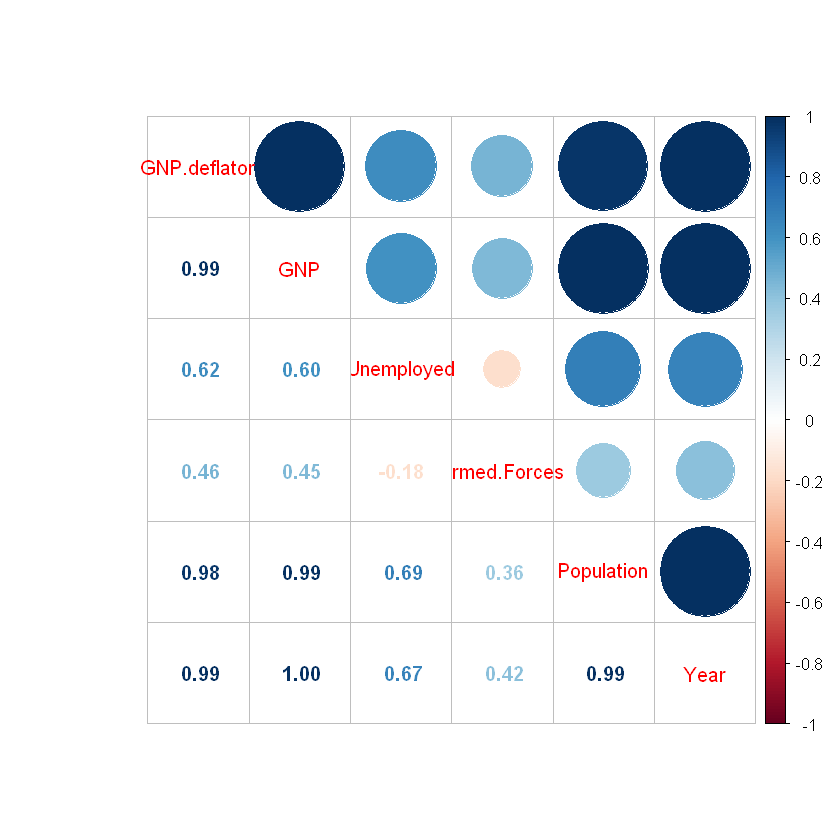

In [6]:
library(corrplot)
corrplot.mixed(XX)

复共线性

In [7]:
(R2=summary(fm1)$r.sq)
(R=sqrt(R2))

[1] 0.995479

[1] 0.9977369

复相关系数反映了一个变量与另一组变量关系的密切程度，复相关系数的假设检验等价于多元回归的方差分析结果

In [8]:
fm1


Call:
lm(formula = Employed ~ ., data = longley)

Coefficients:
 (Intercept)  GNP.deflator           GNP    Unemployed  Armed.Forces  
  -3.482e+03     1.506e-02    -3.582e-02    -2.020e-02    -1.033e-02  
  Population          Year  
  -5.110e-02     1.829e+00  


方差分析

In [9]:
anova(fm1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
GNP.deflator,1,174.3974498,174.39744978,1876.532648,9.295384e-12
GNP,1,4.7871810,4.78718104,51.510510,5.210906e-05
Unemployed,1,2.2639711,2.26397111,24.360538,8.070597e-04
Armed.Forces,1,0.8763972,0.87639716,9.430114,1.333568e-02
Population,1,0.3485894,0.34858940,3.750854,8.475523e-02
Year,1,1.4988134,1.49881345,16.127371,3.036803e-03
Residuals,9,0.8364241,0.09293601,NA,NA


第二问：主成分回归


In [10]:
PCA=princomp(X)
PCA

Call:
princomp(x = X)

Standard deviations:
     Comp.1      Comp.2      Comp.3      Comp.4      Comp.5      Comp.6 
119.9942178  81.4559275  33.6025824   1.2394930   0.3603508   0.1630775 

 6  variables and  16 observations.

In [11]:
summary(PCA)

Importance of components:
                            Comp.1     Comp.2      Comp.3       Comp.4
Standard deviation     119.9942178 81.4559275 33.60258238 1.239493e+00
Proportion of Variance   0.6496248  0.2993556  0.05094332 6.931545e-05
Cumulative Proportion    0.6496248  0.9489803  0.99992363 9.999929e-01
                             Comp.5       Comp.6
Standard deviation     3.603508e-01 1.630775e-01
Proportion of Variance 5.858589e-06 1.199858e-06
Cumulative Proportion  9.999988e-01 1.000000e+00

proportion of variance：用此计算方差累计贡献率

In [12]:
PCA$loadings


Loadings:
             Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
GNP.deflator                       0.957  0.270       
GNP           0.756  0.319  0.557                     
Unemployed    0.626 -0.580 -0.521                     
Armed.Forces  0.158  0.748 -0.644                     
Population                        -0.280  0.928  0.237
Year                                     -0.246  0.968

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.167  0.167  0.167  0.167  0.167  0.167
Cumulative Var  0.167  0.333  0.500  0.667  0.833  1.000

In [31]:
(phi=eigen(t(X)%*%X)$vectors)
(gam=diag(eigen(t(X)%*%X)$values))
Z=X%*%phi
y=longley[,7]
print((gam[1,1])/sum(diag(gam)))

-0.04990131,-0.06979071,-0.03416853,0.04265870,0.95653127,-0.2733126381
-0.19075418,-0.72496814,-0.34330489,0.55402997,-0.07487553,0.0872940138
-0.15702286,-0.62152746,0.56371985,-0.52067703,-0.00716578,0.0105568115
-0.12796016,-0.10434859,-0.74630465,-0.64468394,-0.01222896,-0.0001122542
-0.05758090,-0.03841364,-0.01095845,0.03583083,-0.28108541,-0.9564496276
-0.95748481,0.26625145,0.07812474,0.05679111,-0.01522131,0.0526555591


66652993,0,0,0.00,0.0000,0.000000
0,209073,0,0.00,0.0000,0.000000
0,0,105355,0.00,0.0000,0.000000
0,0,0,18039.76,0.0000,0.000000
0,0,0,0.00,24.5573,0.000000
0,0,0,0.00,0.0000,2.015117


[1] 0.9950363


In [14]:
(alphhat=solve(t(Z)%*%Z)%*%t(Z)%*%y)

-0.03202462
-0.01579553
-0.01238146
0.03092064
0.05977831
0.41935835


In [15]:
sighat=(t(y-Z%*%alphhat)%*%(y-Z%*%alphhat))/10

In [16]:
sighat^2/(max(alphhat^2))

0.2898738


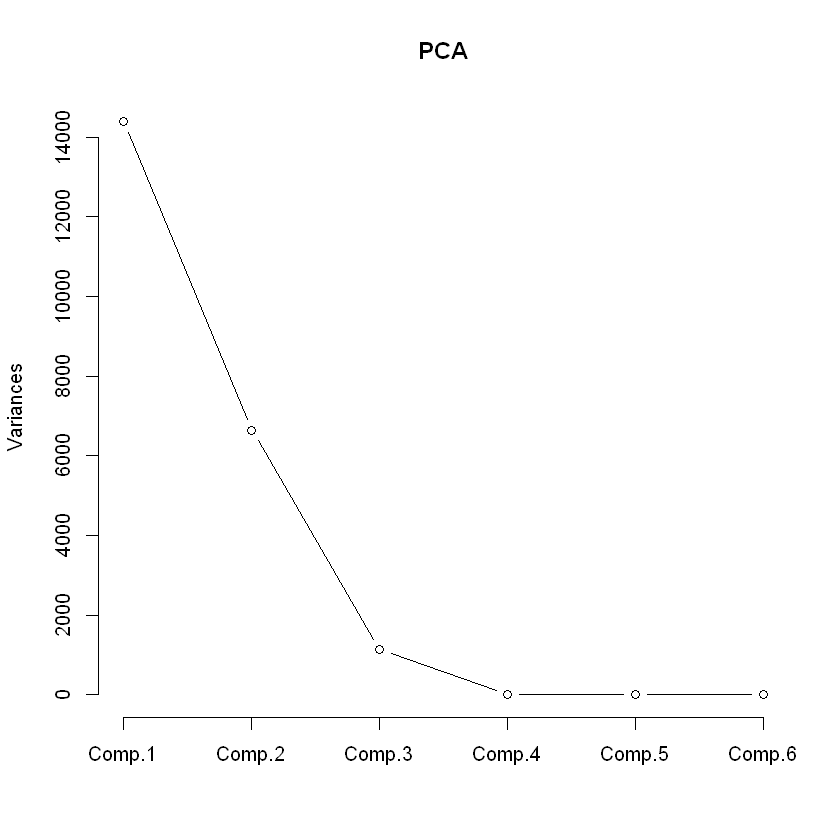

In [17]:
screeplot(PCA,type="lines")

In [18]:
PCA$scores

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
1947,-186.815347,-77.33947,22.345741,-1.66717569,0.16426123,0.014679660
1948,-171.311270,-77.32377,46.886501,1.59392275,0.44125624,-0.002729354
1949,-84.775631,-144.51556,-34.775193,-0.09197078,0.07333248,0.027528440
1950,-84.686569,-114.21523,-4.831726,-0.97860307,-0.48876219,-0.014369264
1951,-106.055970,81.27695,-7.968592,0.88091718,-0.06294837,-0.415112501
1952,-94.827962,133.85254,-20.989923,0.51859577,0.10813793,-0.157526245
1953,-85.336082,139.87296,-4.369158,-0.41417718,0.43865313,0.218775137
1954,16.981934,25.36012,-81.743983,-0.60288359,0.13961651,0.131776627
1955,-3.800600,52.91579,-7.946042,-1.51753122,-0.75033688,0.002658825
1956,4.865385,50.46412,20.936166,0.01371786,-0.43545973,0.233819198


In [19]:
source("mvstats.R")
princomp.rank(PCA,m=2)

,Comp.1,Comp.2,PC,rank
1947,-186.815347,-77.33947,-152.28121,1
1948,-171.311270,-77.32377,-141.66294,2
1949,-84.775631,-144.51556,-103.62057,3
1950,-84.686569,-114.21523,-94.00137,4
1951,-106.055970,81.27695,-46.96186,5
1952,-94.827962,133.85254,-22.69077,6
1953,-85.336082,139.87296,-14.29396,7
1954,16.981934,25.36012,19.62483,10
1955,-3.800600,52.91579,14.09057,8
1956,4.865385,50.46412,19.24949,9


,Comp.1,Comp.2,PC,rank
1947,-186.815347,-77.33947,-152.28121,1
1948,-171.311270,-77.32377,-141.66294,2
1949,-84.775631,-144.51556,-103.62057,3
1950,-84.686569,-114.21523,-94.00137,4
1951,-106.055970,81.27695,-46.96186,5
1952,-94.827962,133.85254,-22.69077,6
1953,-85.336082,139.87296,-14.29396,7
1954,16.981934,25.36012,19.62483,10
1955,-3.800600,52.91579,14.09057,8
1956,4.865385,50.46412,19.24949,9


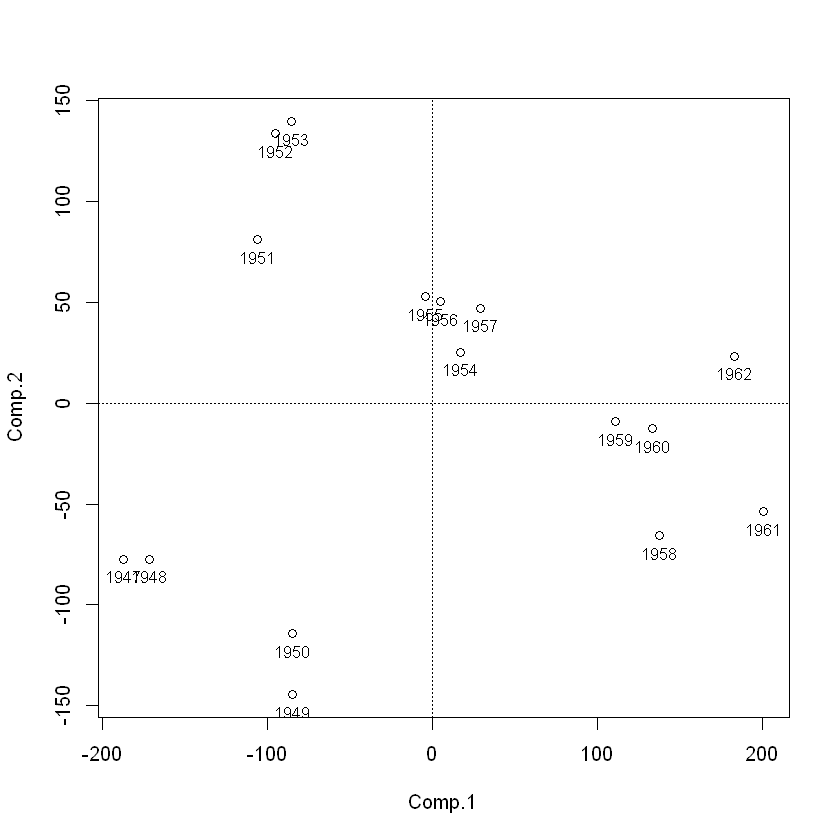

In [20]:
princomp.rank(PCA,m=2,plot=T)

## 岭回归

In [21]:
library(ridge)
mod <- linearRidge(fm1)
summary(mod)

Warning message:
"package 'ridge' was built under R version 4.2.2"



Call:
linearRidge(formula = fm1)


Coefficients:
               Estimate Scaled estimate Std. Error (scaled) t value (scaled)
(Intercept)  -4.361e+02              NA                  NA               NA
GNP.deflator  8.626e-02       3.605e+00           7.685e-01            4.691
GNP           1.151e-02       4.433e+00           3.306e-01           13.408
Unemployed   -8.884e-03      -3.215e+00           6.759e-01            4.757
Armed.Forces -3.554e-03      -9.580e-01           5.931e-01            1.615
Population    1.136e-01       3.061e+00           6.383e-01            4.795
Year          2.449e-01       4.515e+00           3.990e-01           11.318
             Pr(>|t|)    
(Intercept)        NA    
GNP.deflator 2.72e-06 ***
GNP           < 2e-16 ***
Unemployed   1.97e-06 ***
Armed.Forces    0.106    
Population   1.62e-06 ***
Year          < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Ridge parameter: 0.04813729, chosen automatically, compute

岭迹法寻岭参数

In [22]:
library("MASS")
rig=lm.ridge(Employed~.,longley)

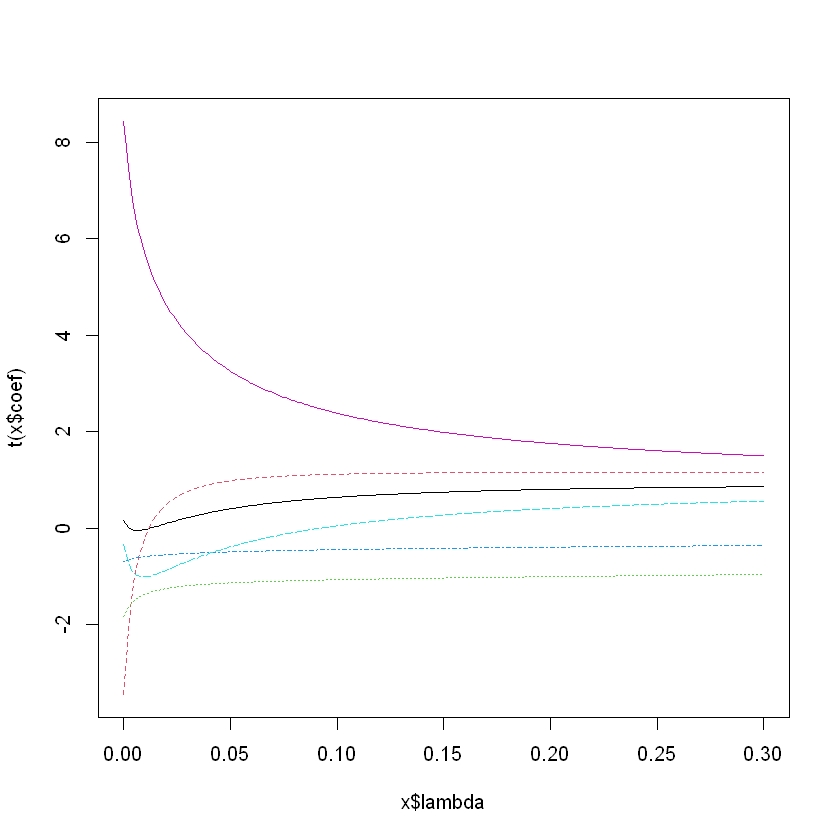

In [23]:
plot(lm.ridge(Employed~.,longley,lambda = seq(0,0.3,0.001)))

In [24]:
#GCV整出来是0啊
rig$lambda[which.min(rig$GCV)]

[1] 0

下面用Hoerl-Kennard公式来估

In [25]:
phi=eigen(t(X)%*%X)$vectors
gam=diag(eigen(t(X)%*%X)$values)
Z=X%*%phi
y=longley[,7]

In [26]:
(alphhat=solve(gam)%*%t(Z)%*%y)

-0.03202462
-0.01579553
-0.01238146
0.03092064
0.05977831
0.41935835


In [27]:
sighat=(t(y-Z%*%alphhat)%*%(y-Z%*%alphhat))/10

In [28]:
sighat^2/(max(alphhat^2))

0.2898738


In [29]:
t(X)*X

ERROR: Error in t(X) * X: non-conformable arrays


In [ ]:
as.matrix(X)

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year
1947,83.0,234.289,235.6,159.0,107.608,1947
1948,88.5,259.426,232.5,145.6,108.632,1948
1949,88.2,258.054,368.2,161.6,109.773,1949
1950,89.5,284.599,335.1,165.0,110.929,1950
1951,96.2,328.975,209.9,309.9,112.075,1951
1952,98.1,346.999,193.2,359.4,113.270,1952
1953,99.0,365.385,187.0,354.7,115.094,1953
1954,100.0,363.112,357.8,335.0,116.219,1954
1955,101.2,397.469,290.4,304.8,117.388,1955
1956,104.6,419.180,282.2,285.7,118.734,1956


In [ ]:
(A=matrix(1:6,nrow=2))

1,3,5
2,4,6


In [ ]:
t(A)%*%A

5,11,17
11,25,39
17,39,61
